Цель: Обучить модель "Дерево решений" и проверить её точность.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

После импорта библиотек, считываем данные с файла.

In [63]:
#считывание данных с файла
df = pd.read_csv('vgsales_20(19).csv')
df

,Rank,Name,Platform,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,7,New Super Mario Bros.,DS,Platform,Nintendo,9.23,6.50,2.90,30.01
1,373,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,Platform,Nintendo,0.50,1.75,0.08,3.51
2,70,Gran Turismo 2,PS,Racing,Sony Computer Entertainment,3.42,1.69,0.50,9.49
3,1326,4 Nin uchi Mahjong,NES,Misc,Nintendo,0.00,1.45,0.00,1.45
4,1523,Romancing SaGa 3,SNES,Role-Playing,SquareSoft,0.00,1.29,0.01,1.30
...,...,...,...,...,...,...,...,...,...
538,9879,NBA 2K2,GC,Sports,Sega,0.02,0.00,0.00,0.12
539,881,Scooby Doo and the Cyber Chase,PS,Adventure,THQ,1.23,0.00,0.13,1.94
540,9897,Battles of Prince of Persia,DS,Strategy,Ubisoft,0.01,0.00,0.01,0.12
541,4571,NBA Street,GC,Sports,Electronic Arts,0.09,0.00,0.01,0.42


Используя OrdinalEncoder преобразуем данные.
Данное преобразование позволяет нам изменить данные в столбцах, которые ранее были типа object на численный. С помощью функции fit() получим данные из столбцов для дальнейшего изменения. Для столбца "Genre" используем тип кодирования "OneHotEncoder", так как при кодировании в нём появляется примерно равное количество единиц и нулей, а во всех других столбцах единица повторяется всего от 1 до 3 раз. Если так не сделать, будет ошибка с формированием древа, так как будут присутствовать нулевые элементы. 

In [64]:
from sklearn.preprocessing import OrdinalEncoder

Oenc = OrdinalEncoder()
df[['Name', 'Platform', 'Publisher']] = Oenc.fit_transform(df[['Name', 'Platform', 'Publisher']])
df

,Rank,Name,Platform,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,7,325.0,3.0,Platform,95.0,9.23,6.50,2.90,30.01
1,373,117.0,18.0,Platform,95.0,0.50,1.75,0.08,3.51
2,70,182.0,11.0,Racing,115.0,3.42,1.69,0.50,9.49
3,1326,1.0,9.0,Misc,95.0,0.00,1.45,0.00,1.45
4,1523,382.0,18.0,Role-Playing,120.0,0.00,1.29,0.01,1.30
...,...,...,...,...,...,...,...,...,...
538,9879,305.0,6.0,Sports,113.0,0.02,0.00,0.00,0.12
539,881,397.0,11.0,Adventure,124.0,1.23,0.00,0.13,1.94
540,9897,35.0,3.0,Strategy,132.0,0.01,0.00,0.01,0.12
541,4571,310.0,6.0,Sports,38.0,0.09,0.00,0.01,0.42


In [65]:
from sklearn.preprocessing import OneHotEncoder

OHenc = OneHotEncoder()
df['Genre'] = OHenc.fit_transform(df[['Genre']]).toarray()
df

,Rank,Name,Platform,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,7,325.0,3.0,0.0,95.0,9.23,6.50,2.90,30.01
1,373,117.0,18.0,0.0,95.0,0.50,1.75,0.08,3.51
2,70,182.0,11.0,0.0,115.0,3.42,1.69,0.50,9.49
3,1326,1.0,9.0,0.0,95.0,0.00,1.45,0.00,1.45
4,1523,382.0,18.0,0.0,120.0,0.00,1.29,0.01,1.30
...,...,...,...,...,...,...,...,...,...
538,9879,305.0,6.0,0.0,113.0,0.02,0.00,0.00,0.12
539,881,397.0,11.0,0.0,124.0,1.23,0.00,0.13,1.94
540,9897,35.0,3.0,0.0,132.0,0.01,0.00,0.01,0.12
541,4571,310.0,6.0,0.0,38.0,0.09,0.00,0.01,0.42


После преобразование данных, можем начать работу.
Разделить датасет на обучающую и тестовую выборку.
Подключаем библиотеку train_test_split.
Y - столбец с обучающими данными, Х - столбец с тестовыми данными. Далле с помощью функции train_test_split разбиваем на выборки. 
random_state - параметр для управления перетасовкой,
test_size - значение с плавающей точкой. 
Посмотрим что находится в каждой переменной. 

In [66]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [67]:
from sklearn.model_selection import train_test_split

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y)

Теперь обучим данные с использованием библиотеки и функции fit

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier()
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])


Теперь создаем само древо. 

[Text(0.5, 0.875, 'x[3] <= 36.0\ngini = 0.25\nsamples = 41\nvalue = [35, 6]'),
 Text(0.3, 0.625, 'x[4] <= 0.015\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2, 0.375, 'x[3] <= 25.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.1, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7, 0.625, 'x[0] <= 14437.0\ngini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.6, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.8, 0.375, 'x[1] <= 366.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.7, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

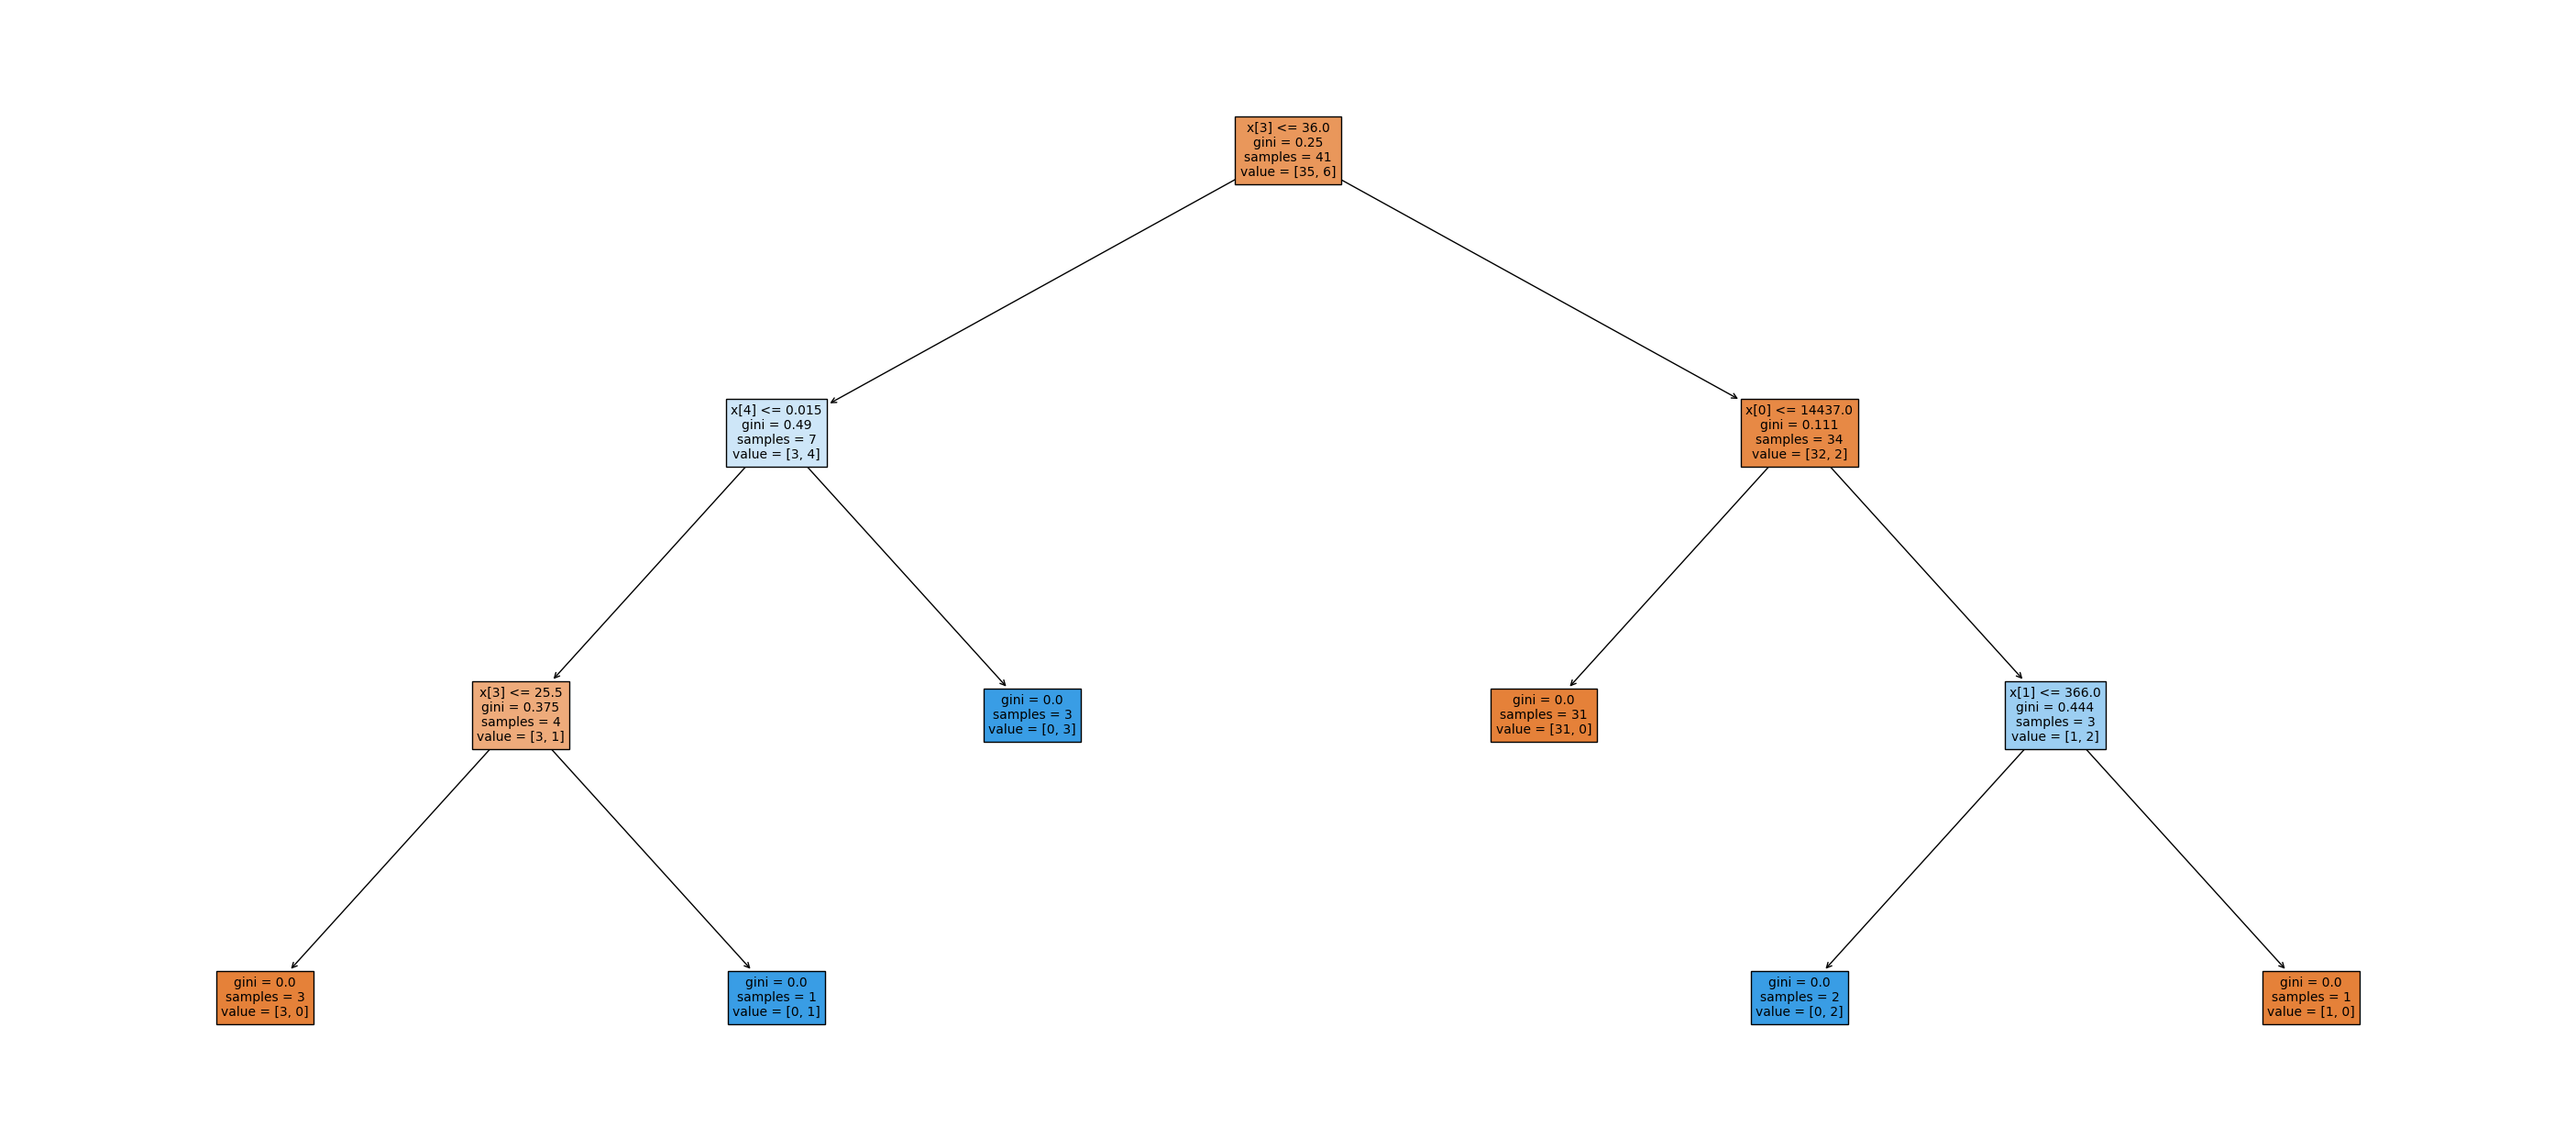

In [69]:
from sklearn import tree
plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

 (Опционально) Показать структуру модели "Дерева решений" без настроек;

Text(50.722222222222214, 0.5, 'Реально')

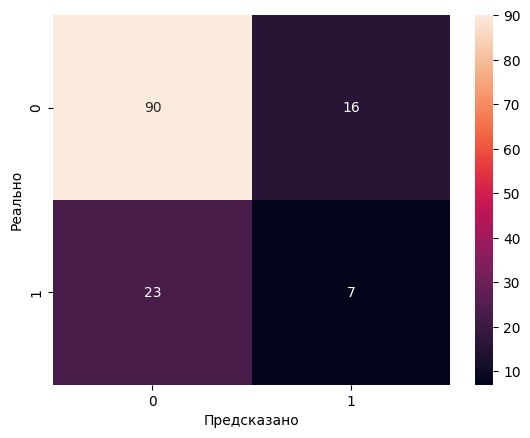

In [70]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

Результаты таковы. 
90 раз было предсказно правильно, что жанром не будет "Action". 
16 раз было предсказно неправильно, что жанром не будет "Action". 
23 раз было предсказно неправильно, что жанром будет "Action".
7 раз было предсказно правильно, что жанром будет "Action". 

Использовав метрики (confusion matrix, accuracy score, recall score, precision score, f1 score) провести анализ точности модели и описать;

In [71]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.7132352941176471
Чувствительность 0.23333333333333334
Аккуратность 0.30434782608695654
Финальная 0.26415094339622636


Снова обучить модель "Дерево решений" но уже с использованием гиперпараметров (настроек);

[Text(0.5555555555555556, 0.875, 'x[0] <= 13293.0\ngini = 0.298\nsamples = 44\nvalue = [36, 8]'),
 Text(0.3333333333333333, 0.625, 'x[7] <= 1.215\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(0.2222222222222222, 0.375, 'x[1] <= 424.0\ngini = 0.077\nsamples = 25\nvalue = [24, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.7777777777777778, 0.625, 'x[3] <= 104.5\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]')]

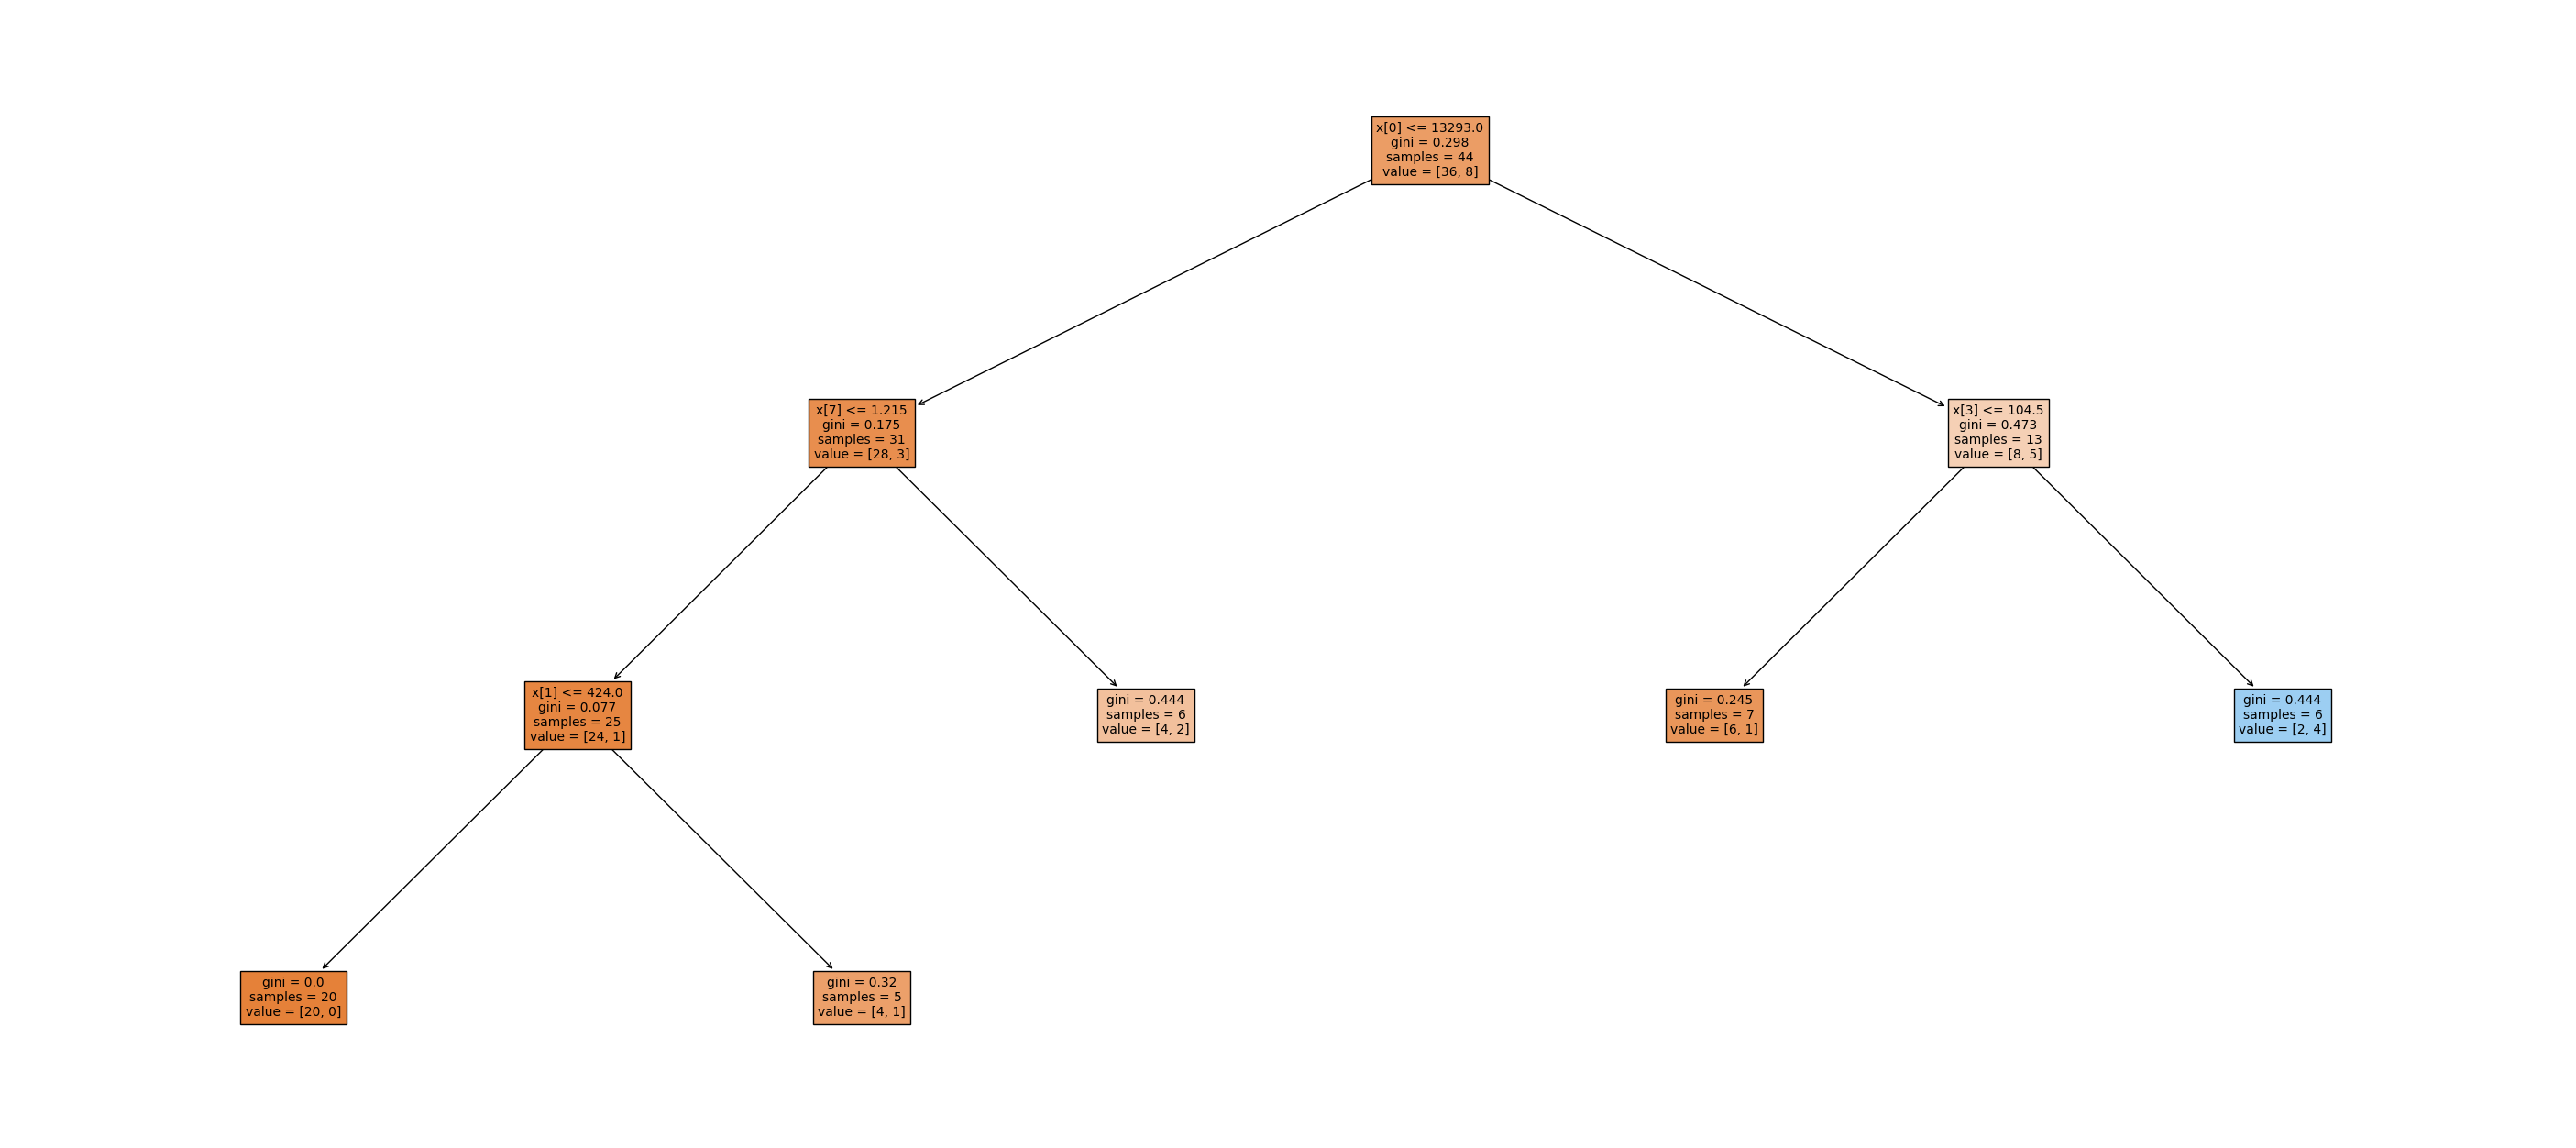

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=200)
dtc_plot = dtc_plot.fit(x_train.iloc[::10], y_train.iloc[::10])

plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

(Опционально) Показать структуру модели "Дерева решений" без настроек;

Text(50.722222222222214, 0.5, 'Реально')

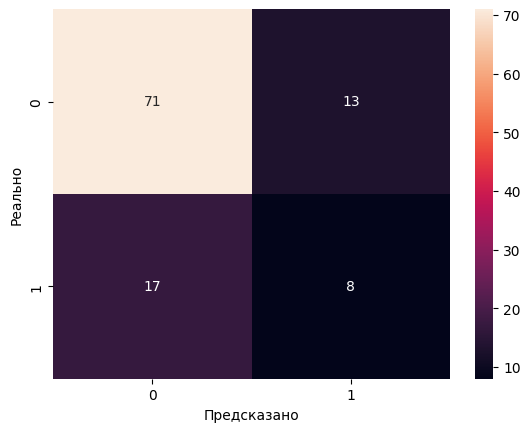

In [73]:
from sklearn import metrics
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

Результаты таковы. 
71 раза было предсказно правильно, что жанром не будет "Action". 
13 раз было предсказно неправильно, что жанром не будет "Action". 
17 раз было предсказно неправильно, что жанром будет "Action".
8 раз было предсказно правильно, что жанром будет "Action". 

Использовав метрики (confusion matrix, accuracy score, recall score, precision score, f1 score) провести анализ точности модели и описать;

In [74]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.7247706422018348
Чувствительность 0.32
Аккуратность 0.38095238095238093
Финальная 0.34782608695652173


1. Модель "Дерева решений":
   - Точность: 71%. Эта метрика отражает долю правильных предсказаний модели относительно общего числа предсказаний. В данном случае, модель достигает точности около 71%, что означает, что примерно 71% предсказаний были верными.
   - Чувствительность: 23%. Чувствительность показывает долю правильно определенных положительных случаев от общего количества фактически положительных случаев. В данной модели чувствительность составляет около 23%, что означает, что она правильно определяет примерно 23% фактических положительных случаев.
   - Аккуратность: 30%. Аккуратность представляет собой долю правильно определенных положительных случаев от общего числа предсказанных положительных случаев. В данной модели аккуратность составляет около 30%, что означает, что примерно 30% предсказанных положительных случаев являются правильными.
   - Финальная: 26%. Финальная метрика является балансом между точностью и чувствительностью и применяется в случаях, когда имеется дисбаланс классов или обе метрики имеют одинаковую важность. Значение 26% указывает на сбалансированность модели между точностью и чувствительностью.

2. Модель "Дерева решений":
   - Точность: 72%. Модель достигает точности примерно 72%, что означает долю правильных предсказаний от общего числа предсказаний.
   - Чувствительность: 32%. В данной модели чувствительность составляет около 32%, что означает правильно определенные положительные случаи от общего количества фактически положительных случаев.
   - Аккуратность: 38%. Аккуратность составляет около 38%, что означает правильно определенные положительные случаи от общего числа предсказанных положительных случаев.
   - Финальная: 35%. Значение 35% указывает на сбалансированность модели между точностью и чувствительностью, что является хорошей метрикой в случае дисбаланса классов или одинаковой важности обеих метрик.

Вывод: В ходе данной практической работы, прошло обучение  модели "Дерево решений", а также проверена ее точность. Второй вариат обучения показал более точные показатели. Их можно сравнить в описании к модели. 